In [1]:
import qiskit
qiskit.__qiskit_version__

C:\Users\SOUMYABRATA PC\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.5', 'qiskit': '0.29.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
from qiskit import IBMQ
IBMQ.save_account('45cab17ed9aad047f4123be4253fb136d7e9195f20904a4759952c48c0a0f8524c67f5b73ada7100635cc12d0dd4fca609902af6f578d8aec42faceb4331f301')

configrc.store_credentials:WARNING:2021-09-17 15:30:25,948: Credentials already present. Set overwrite=True to overwrite.


In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [1]:
from qiskit import QuantumCircuit, assemble, execute, Aer 
from qiskit.visualization import plot_histogram , plot_bloch_multivector ,array_to_latex ,plot_state_qsphere
import numpy as np
sim = Aer.get_backend('aer_simulator') 

In [5]:
n=8
n_q=n         # number of qubits in the circuit.
n_b=n         # number of output bits 
qc_output=QuantumCircuit(n_q,n_b)

In [6]:
#for j in range(n):
#    qc_output.measure(j,j)
#qc_output.measure_all()     # Apply measurement to all qbits
qc_output.measure(2,3)

In [7]:
#qc_output.draw()

from qiskit.visualization import circuit_drawer
circuit_drawer(qc_output)

q_0: ───
        
q_1: ───
     ┌─┐
q_2: ┤M├
     └╥┘
q_3: ─╫─
      ║ 
q_4: ─╫─
      ║ 
q_5: ─╫─
      ║ 
q_6: ─╫─
      ║ 
q_7: ─╫─
      ║ 
c: 8/═╩═
      3

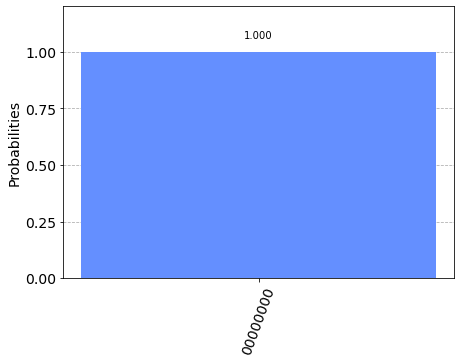

In [46]:
qc_output=QuantumCircuit(8,8)
sim = Aer.get_backend('aer_simulator')     # performing the operations on ideal quantum simulator not on real quantum device
qobj = assemble(qc_output)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

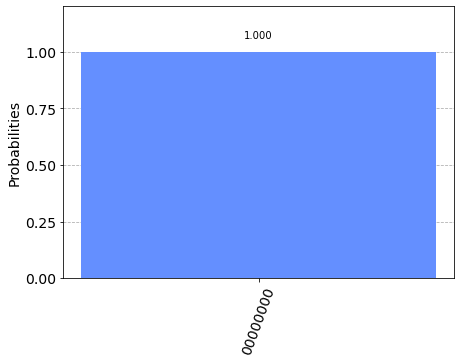

In [42]:
qc_output=QuantumCircuit(8,8)
sim = Aer.get_backend('statevector_simulator')
job = execute(qc_output,sim, shots=1024)    # shots is optional
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
#result.get_statevector(qc_output)

In [3]:
qc_output = QuantumCircuit(2)
couple_map = [[0, 1],[1, 2]]
sim = Aer.get_backend('qasm_simulator')
job = execute(qc_output, sim, shots=1024, coupling_map=couple_map)
result = job.result()
plot_histogram(result.get_counts())

QiskitError: 'No counts for experiment "0"'

In [6]:
qc_output=QuantumCircuit(2)
qc_output.h(0)
sim = Aer.get_backend('unitary_simulator')
job = execute(qc_output,sim, shots=1024)    # shots is optional
result = job.result()
unitary = result.get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [9]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [10]:
qc=qc_encode + qc_output
qc.draw()

<ipython-input-10-8c3a22576648>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qc_encode + qc_output
C:\Users\SOUMYABRATA PC\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
   c: 8/═════════╬══╬══╬══╬══╬══╬══╬══╬═
                 ║  ║  ║  ║  ║  ║  ║  ║ 
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

# Combining two quantum circuits

In [23]:
qc = QuantumCircuit(4)
qc.h(range(4))
qc.draw()
from qiskit.circuit.library import QFT
qft = QFT(2)
qft.draw()
new_qc = qc.compose(qft,[1,3])
new_qc.draw()
#qc.qubits

┌───┐        
q_0: ┤ H ├────────
     ├───┤┌──────┐
q_1: ┤ H ├┤0     ├
     ├───┤│      │
q_2: ┤ H ├┤  QFT ├
     ├───┤│      │
q_3: ┤ H ├┤1     ├
     └───┘└──────┘

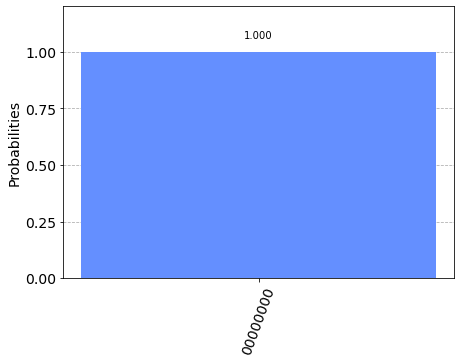

In [38]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [39]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

In [46]:
qc = QuantumCircuit(1) 
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.save_statevector()        # Tell simulator to save statevector
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
result = sim.run(qobj).result()

In [47]:
output_state = result.get_statevector()
print(output_state)

[0.+0.j 1.+0.j]


In [42]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

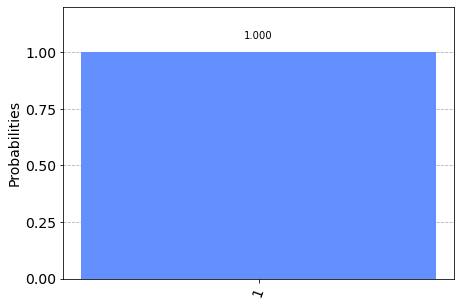

In [43]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Qubit State = [0.70710678+0.j         0.        +0.70710678j]


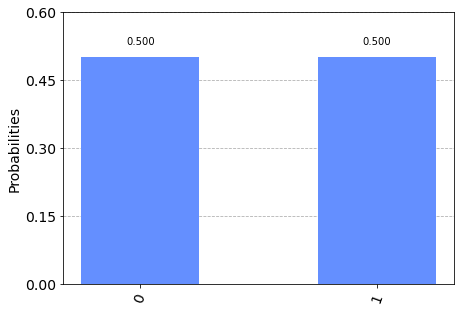

In [50]:
qc = QuantumCircuit(1)
initial_state = [ 1/np.sqrt(2), 1j/np.sqrt(2)]
qc.initialize(initial_state,0)
#qc.measure_all()               #  To apply measurement
qc.save_statevector()

qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
print("Qubit State = " + str(result.get_statevector()))
plot_histogram(counts)     #  50 % probability in "0" and "1" state but state has not collapsed. (No Measurement)


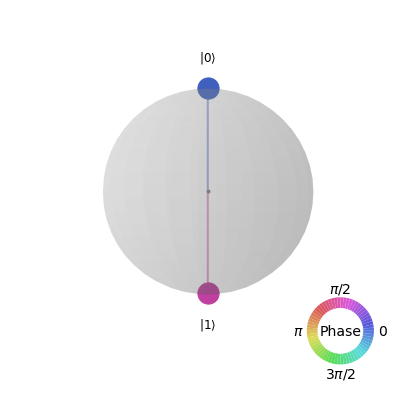

In [18]:
Qubit_State = result.get_statevector()
#plot_bloch_multivector(Qubit_State)    # takes qubit's statevector instead of the Bloch vector
#array_to_latex(Qubit_State)     # representing in latex
plot_state_qsphere(Qubit_State)   # plotting in Q-sphere

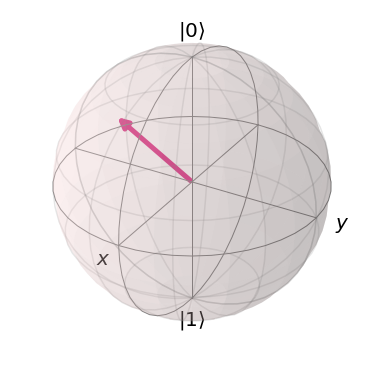

In [3]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,1])    # [<x>, <y>, <z>] bloch vector


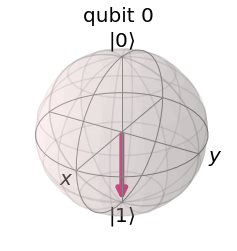

In [7]:
#state = [0, 1/np.sqrt(2), 1/np.sqrt(2), 0]    # plotting Bell State in bloch sphere
state = [0,1j]
plot_bloch_multivector(state)

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.save_unitary()
qobj = assemble(qc)
result = sim.run(qobj).result()
Unitary_Operator = result.get_unitary()  # X direct product H
array_to_latex(Unitary_Operator)

<IPython.core.display.Latex object>

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [2]:
from qiskit import BasicAer
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

# Read a QASM file

In [21]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.t([0,1])
qc.measure_all()
qc.draw()

┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ T ├─░─┤M├──────
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ T ├─░──╫─┤M├───
             └───┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ────────────────░──╫──╫─┤M├
                        ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [22]:
#  QASM = Quantum Assembly Language  #
qc.qasm()      #  converts QuantumCircuit to QASM string
print(qc.qasm())     # to display properly use print method


OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg meas[3];
h q[0];
cx q[0],q[1];
t q[0];
t q[1];
barrier q[0],q[1],q[2];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];



In [25]:
#qc.qasm(formatted=True)
qc.qasm(formatted=True, filename='my_circuit.qasm')    # Saving the QASM string as a file with name = 'my_circuit.qasm'
new_qc = QuantumCircuit.from_qasm_file('my_circuit.qasm')     # Read the QASM file and generate QuantumCircuit object
new_qc.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg meas[3];
h q[0];
cx q[0],q[1];
t q[0];
t q[1];
barrier q[0],q[1],q[2];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];



┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ T ├─░─┤M├──────
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ T ├─░──╫─┤M├───
             └───┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ────────────────░──╫──╫─┤M├
                        ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [18]:
qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

h q[0];                                           
z q[0];"""                                        #  qasm_str is a QASM string object
qc = QuantumCircuit.from_qasm_str(qasm_str)      #  loading the QASM string      converts QASM string to QuantumCircuit object
#qc = QuantumCircuit.from_qasm_file("file.qasm")    #  loading the QASM from a file

qc.draw()


┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘
c: 1/══════════

In [7]:
qc = QuantumCircuit(3, 1)

qc.x(0)
qc.barrier()
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 2)
qc.barrier()
qc.measure(2,0)
qc.draw(), print("Depth_of_Circuit = " + str(qc.depth()))

Depth_of_Circuit = 5


(     ┌───┐ ░                 ░    
 q_0: ┤ X ├─░───■─────────■───░────
      └───┘ ░   │         │   ░    
 q_1: ──────░───┼────■────■───░────
            ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
 q_2: ──────░─┤ X ├┤ X ├┤ X ├─░─┤M├
            ░ └───┘└───┘└───┘ ░ └╥┘
 c: 1/═══════════════════════════╩═
                                 0 ,
 None)

In [60]:
initial_state = [1/np.sqrt(3), np.sqrt(2/3)]
qr = QuantumRegister(1,'q')
qc = QuantumCircuit(qr)
qc.initialize(initial_state,0)
sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result()
final_state = result.get_statevector()

from qiskit.quantum_info import state_fidelity
state_fidelity(initial_state, final_state)    # fidelity = 1, they are same state


1.0

In [68]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j/2)*op_a
average_gate_fidelity(op_a, op_b)
process_fidelity(op_a, op_b)

1.0

In [16]:
from qiskit import QuantumRegister
input_register = QuantumRegister(2,name = 'inp') # size = 2 two qubits
ancilla = QuantumRegister(1,name = 'anc')
qc = QuantumCircuit(input_register,ancilla)
qc.h(input_register)      #   qc.h(input_register[0:2])
qc.x(ancilla)            #   qc.x(ancilla[0])


qc.draw()


┌───┐
inp_0: ┤ H ├
       ├───┤
inp_1: ┤ H ├
       ├───┤
anc_0: ┤ X ├
       └───┘

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw()

┌───┐          ┌───┐           ░ ┌─┐      
      q_0: ┤ H ├───────■──┤ H ├───────────░─┤M├──────
           ├───┤       │  └───┘┌───┐      ░ └╥┘┌─┐   
      q_1: ┤ H ├───────┼────■──┤ H ├──────░──╫─┤M├───
           ├───┤       │    │  └───┘┌───┐ ░  ║ └╥┘┌─┐
      q_2: ┤ H ├───────┼────┼────■──┤ H ├─░──╫──╫─┤M├
           ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░  ║  ║ └╥┘
ancilla_0: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─────────╫──╫──╫─
           └───┘└───┘└───┘└───┘└───┘         ║  ║  ║ 
      c: 3/══════════════════════════════════╩══╩══╩═
                                             0  1  2

In [9]:
qc_hp4 = QuantumCircuit(2)
#qc_hp4.x(0)
qc_hp4.h(0)
qc_hp4.cx(0,1)
qc_hp4.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [14]:
import qiskit.quantum_info as qi
unitary_hp4 = qi.Operator(qc_hp4)
print(unitary_hp4.data)
array_to_latex(unitary_hp4)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


<IPython.core.display.Latex object>

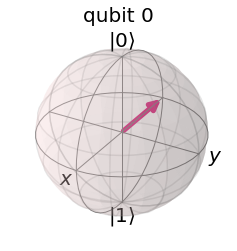

In [22]:
qc = QuantumCircuit(1,1)
# Insert code fragment here
qc.h(0)
qc.rz(-np.pi/2,0) 
qc.rx(np.pi/2,0)
#qc.ry(np.pi/2,0)
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

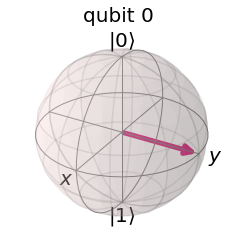

In [14]:
state = [1/np.sqrt(2), 1j/np.sqrt(2)]
plot_bloch_multivector(state)

In [8]:
qc = QuantumCircuit(2)
qc.ry(np.pi/2,0)    # rotation with respect to y axis.   ry(theta,qubit)
qc.rx(np.pi/2,1)    # rotation with respect to x axis.
qc.rz(np.pi/2,1)    # rotation with respect to z axis.
#qc.swap(0,1)
qc.draw()

┌─────────┐              
q_0: ┤ Ry(π/2) ├────────────X─
     ├─────────┤┌─────────┐ │ 
q_1: ┤ Rx(π/2) ├┤ Rz(π/2) ├─X─
     └─────────┘└─────────┘

In [13]:
qc = QuantumCircuit(3)
#qc.cry(np.pi/2,0,1)       # Controlled-RY (cry) Gate   cry(theta, control qubit, target qubit)
qc.crz(np.pi/2,0,1)        # Controlled-RZ (crz) Gate
qc.draw()

q_0: ─────■─────
     ┌────┴────┐
q_1: ┤ Rz(π/2) ├
     └─────────┘
q_2: ───────────

In [4]:
qc = QuantumCircuit(3)
qc.mct([0,2],1)           # Multiple-Control Toffoli gate   mct(list of control qubits,target qubit) 
qc.toffoli(0,1,2)
qc.ccx(0,1,2)
qc.draw()

q_0: ──■────■────■──
     ┌─┴─┐  │    │  
q_1: ┤ X ├──■────■──
     └─┬─┘┌─┴─┐┌─┴─┐
q_2: ──■──┤ X ├┤ X ├
          └───┘└───┘

In [10]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()
sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result()
result.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [30]:
qc = QuantumCircuit(1)
qc.p(np.pi/4, 0)    # P(Phase) gate
qc.i(0)     # Identity gate
qc.s(0)      # S gate
qc.sdg(0)    # S-Dagger gate
qc.t(0)          # T gate
qc.tdg(0)        # T-Dagger gate
qc.draw()

┌────────┐┌───┐┌───┐┌─────┐┌───┐┌─────┐
q_0: ┤ P(π/4) ├┤ I ├┤ S ├┤ Sdg ├┤ T ├┤ Tdg ├
     └────────┘└───┘└───┘└─────┘└───┘└─────┘

In [32]:
qc = QuantumCircuit(3,3)
#qc.barrier(qc)
qc.barrier([0,2])      # barrier(list of qubits)
qc.barrier()
qc.draw()

░  ░ 
q_0: ─░──░─
      ░  ░ 
q_1: ────░─
      ░  ░ 
q_2: ─░──░─
      ░  ░ 
c: 3/══════

# Density Matrix

In [21]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
rho = qi.DensityMatrix(qc)  # to get density matrix of a state, which is produced by a circuit
#print(rho), qc.draw()
rho.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

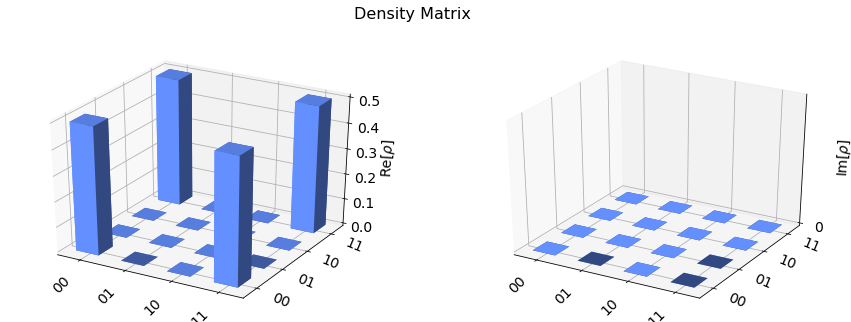

In [25]:
from qiskit.visualization import plot_state_city
plot_state_city(rho, title='Density Matrix')          # plot_state_city(rho.data)

# Plot gate map with error rates

In [ ]:
from qiskit import IBMQ
provider = IBMQ.load_account()

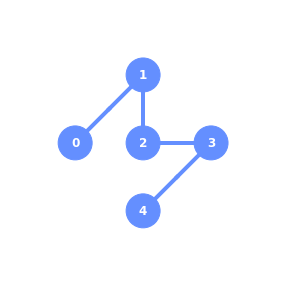

In [11]:
from qiskit.visualization import plot_gate_map, plot_error_map
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend)

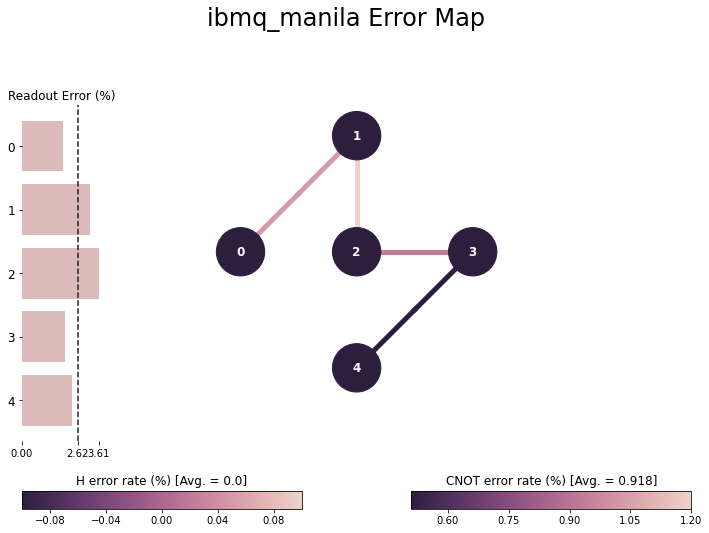

In [12]:
plot_error_map(backend)

In [57]:
from qiskit import QuantumRegister
qr = QuantumRegister(2,'q')
qc = QuantumCircuit(qr)
initial_state = [ 1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc.initialize(initial_state,qr)
qc.save_statevector()
qc.draw()
sim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = sim.run(qobj).result()
result.get_statevector()
array_to_latex(result.get_statevector())

<IPython.core.display.Latex object>